<a href="https://colab.research.google.com/github/srivathsava4046/Mini_Projects/blob/main/MLpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT** **LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# **PREPARE THE DATA**

In [3]:
df_review = pd.read_csv("/content/IMDB Dataset.csv")
df_review.head()



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


This dataset contains 50000 rows; however, to train our model faster in the following steps, we’re going to take a smaller sample of 10000 rows. This small sample will contain 9000 positive and 1000 negative reviews to make the data imbalanced (so I can teach you undersampling and oversampling techniques in the next step)

In [4]:
df_positive = df_review[df_review['sentiment']=='positive'][:9000]
df_negative = df_review[df_review['sentiment']=='negative'][:1000]

df_review_imb = pd.concat([df_positive,df_negative ])

**Dealing with Imbalanced Classes**

In most cases, you’ll have a large amount of data for one class, and much fewer observations for other classes. This is known as imbalanced data because the number of observations per class is not equally distributed.

Let’s take a look at how our df_review_imb dataset is distributed.

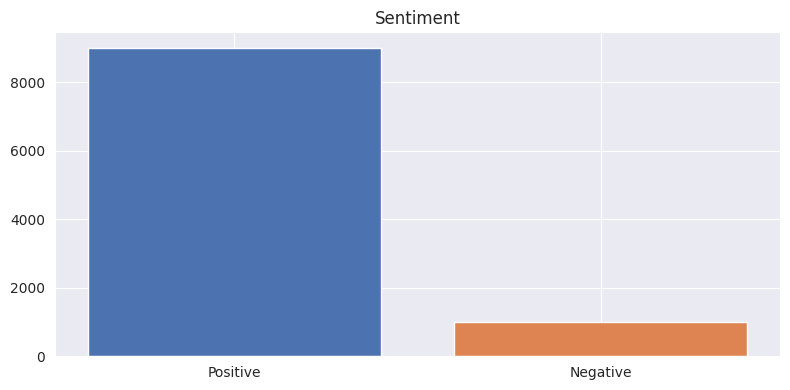

In [5]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_imb.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

To resample our data we use the imblearn library. You can either undersample positive reviews or oversample negative reviews (you need to choose based on the data you’re working with). In this case, we’ll use the RandomUnderSampler

In [6]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state= 0)
df_review_bal,df_review_bal['sentiment']=rus.fit_resample(df_review_imb[['review']],df_review_imb['sentiment'])


df_review_bal

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,Knute Rockne led an extraordinary life and his...,positive
1996,At the height of the 'Celebrity Big Brother' r...,positive
1997,This is another of Robert Altman's underrated ...,positive
1998,This movie won a special award at Cannes for i...,positive


We can compare the imbalanced and balanced dataset with the following code.

In [7]:
print(df_review_imb.value_counts('sentiment'))
print(df_review_bal.value_counts('sentiment'))

sentiment
positive    9000
negative    1000
Name: count, dtype: int64
sentiment
negative    1000
positive    1000
Name: count, dtype: int64


**Splitting data into train and test set**

In [8]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_review_bal,test_size =0.33,random_state=42)

In [9]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [10]:
train_x.value_counts()

review
A convict serving time comes forward to give the Cold Case unit information about the murder of a policeman, committed years before. The murder of Sean Cooper, a good cop, was never solved. Naturally, the detectives believe the new evidence will help them put together all the pieces of the puzzle that frustrated their colleagues.<br /><br />In flashbacks we are taken to the baptism of James Bruno's baby. Sean and Jimmy were partners. There is tension as Sean, who is the godfather, arrives disheveled and late for the rite. Eileen Bruno doesn't appear to be happy being there. The real mystery is revealed by her. She caught Sean, who was drinking with Jimmy in the backyard, kiss her husband, and more shocking yet, Jimmy responding willingly.<br /><br />Somehow at the station the partners become the center of gossip. Sean has not endeared himself to his superior because he discovered the involvement with a criminal in his area who controlled the drug business. Sean realizes this man

In [11]:
train_y.value_counts()

sentiment
negative    675
positive    665
Name: count, dtype: int64

# **Text Representation (Bag of words)**

Classifiers and learning algorithms expect numerical feature vectors rather than raw text documents. This is why we need to turn our movie review text into numerical vectors.

we’ll use bag of words (BOW) since we care about the frequency of the words in text reviews; however, the order of words is irrelevant. Two common ways to represent bag of words are CountVectorizer and Term Frequency, Inverse Document Frequency (TF-IDF)

we want to identify unique/representative words for positive reviews and negative reviews, so we’ll choose the TF-IDF. To turn text data into numerical vectors with TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)

Finally, let's also transform the test_x_vector, so we can test the accuracy of the model later

In [13]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,index=train_x.index,columns=tfidf.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042791,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Model Selection**

In our example, our input (review) and output (sentiment) are clearly identified, so we can say we have labeled input and output data; therefore, we’re dealing with supervised learning.

We will benchmark the four classification models.

**Support Vector Machine**

In [14]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [15]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

['positive']
['positive']
['negative']


**Decision Tree**

In [16]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

**Naive Bayes**

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

**Logistic Regression**

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector,train_y)

LogisticRegression()

# **Model Evaluation**

In [19]:
print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))

0.8409090909090909
0.6575757575757576
0.6348484848484849
0.8303030303030303


SVM and Logistic Regression perform better than the other two classifiers, with SVM having a slight advantage (84% of accuracy).Thus,we’ll focus only on SVM.

# **F1 Score**

F1 Score is the weighted average of Precision and Recall. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Also, F1 takes into account how the data is distributed, so it’s useful when you have data with imbalance classes.

In [20]:
from sklearn.metrics import f1_score

f1_score(test_y,svc.predict(test_x_vector),
          labels = ['positive','negative'],average=None)

array([0.84671533, 0.83464567])

Classification Report

In [21]:
from sklearn.metrics import classification_report

print(classification_report(test_y,
                            svc.predict(test_x_vector),
                            labels = ['positive','negative']))

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



**Confusion Matrix**

A confusion matrix is a table that allows visualization of the performance of an algorithm. This table typically has two rows and two columns that report the number of false positives, false negatives, true positives, and true negatives

In [22]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y,
                           svc.predict(test_x_vector),
                           labels = ['positive', 'negative'])
conf_mat

array([[290,  45],
       [ 60, 265]])